In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline

In [2]:
def power_set(elements):
    sets = (tuple(),)
    for e in elements:
        sets += tuple(s + (e,) for s in sets)
    return sets
def format_interval(interval):
    return '-'.join(map(str, interval))

In [3]:
INTERVALS = power_set((1, 2, 4, 8))

In [4]:
def get_info(identifier, ROUNDS=5):
    accuracy_table, progress_table = [], []
    for i in range(ROUNDS):
        accuracy, progress = pickle.load(open('%s-round%d' % (identifier, i), 'rb'))
        accuracy_table.append(accuracy)
        progress_table.append(progress)
    accuracy = sum(accuracy_table) / ROUNDS
    progress = sorted(progress_table, key=lambda p : accuracy_table[progress_table.index(p)])[ROUNDS // 2]
    return accuracy, progress

In [5]:
normal_accuracy, progress = pickle.load(open('info/triple-state-normal-residual-network-8'))
normal_validation = progress['validation_accuracy']
weight_sharing_accuracy, progress = \
    pickle.load(open('info/triple-state-weight-sharing-residual-network-8'))
weight_sharing_validation = progress['validation_accuracy']
accuracy_table, progress_table = {}, {}
for interval in INTERVALS:
    identifier = 'info/triple-state-hybrid-residual-network-refining-8-interval-%s' % '-'.join(map(str, interval))
    try:
        accuracy, progress = get_info(identifier)
        accuracy_table[interval] = accuracy
        progress_table[interval] = progress
    except: pass

In [6]:
def plot_baseline():
    pl.plot(
        range(len(weight_sharing_validation)),
        weight_sharing_validation,
        label='weight-sharing#%f' % weight_sharing_accuracy
    )
    pl.plot(range(len(normal_validation)), normal_validation, label='normal#%f' % normal_accuracy)

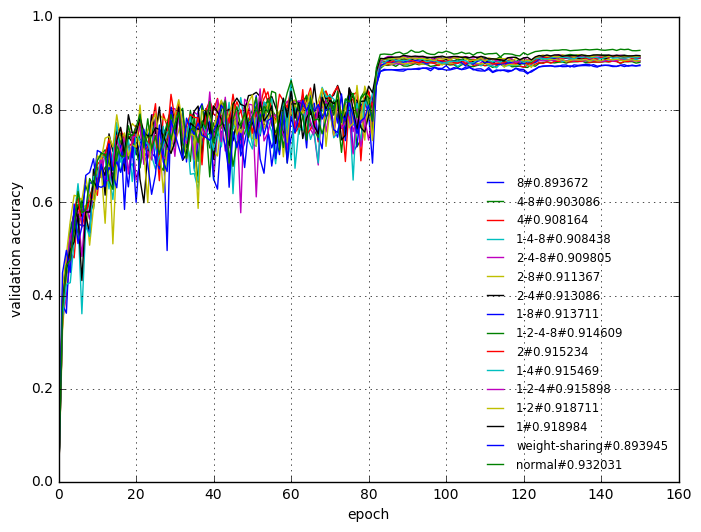

In [7]:
sorted_keys = sorted(progress_table.keys(), key=lambda interval : accuracy_table[interval])
pl.figure(figsize=(8, 6))
for key in sorted_keys:
    value = progress_table[key]
    test_accuracy = accuracy_table[key]
    label = '%s#%f' % (format_interval(key), test_accuracy)
    validation_accuracy = value['validation_accuracy']
    pl.plot(range(len(validation_accuracy)), validation_accuracy, label=label)
plot_baseline()
pl.legend(framealpha=0, loc='best', fontsize='small')
pl.grid()
pl.xlabel('epoch')
pl.ylabel('validation accuracy')

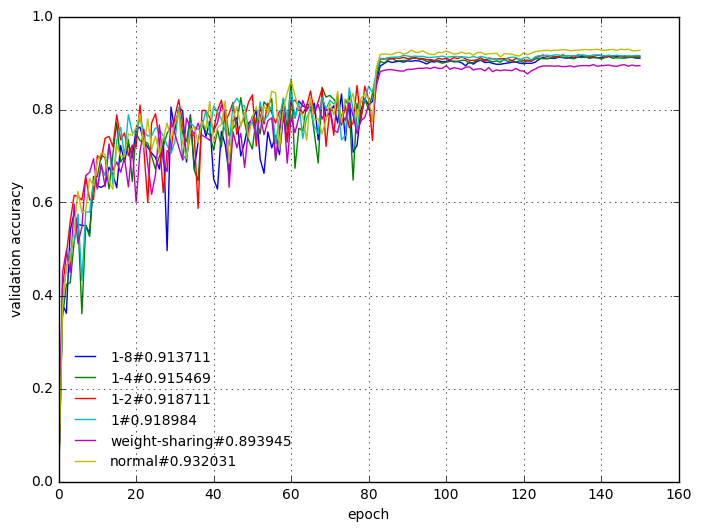

In [8]:
keys = ((1,), (1, 2), (1, 4), (1, 8))
sorted_keys = sorted(keys, key=lambda interval : accuracy_table[interval])
pl.figure(figsize=(8, 6))
for key in sorted_keys:
    value = progress_table[key]
    test_accuracy = accuracy_table[key]
    label = '%s#%f' % (format_interval(key), test_accuracy)
    validation_accuracy = value['validation_accuracy']
    pl.plot(range(len(validation_accuracy)), validation_accuracy, label=label)
plot_baseline()
pl.legend(framealpha=0, loc='best', fontsize='medium')
pl.grid()
pl.xlabel('epoch')
pl.ylabel('validation accuracy')

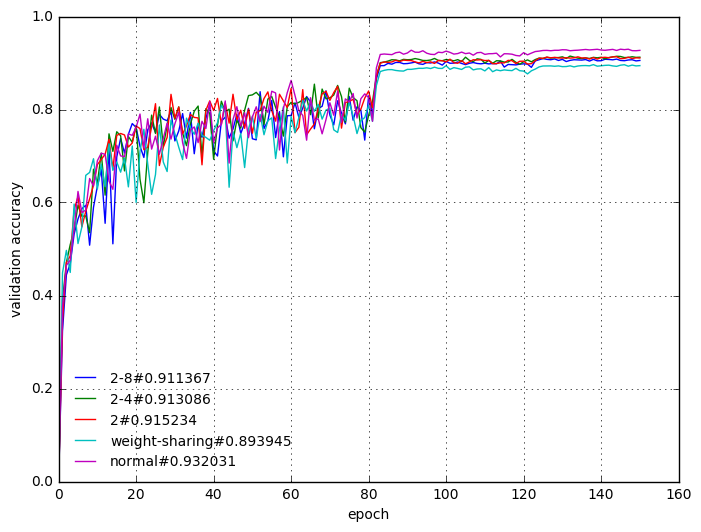

In [9]:
keys = ((2,), (2, 4), (2, 8))
sorted_keys = sorted(keys, key=lambda interval : accuracy_table[interval])
pl.figure(figsize=(8, 6))
for key in sorted_keys:
    value = progress_table[key]
    test_accuracy = accuracy_table[key]
    label = '%s#%f' % (format_interval(key), test_accuracy)
    validation_accuracy = value['validation_accuracy']
    pl.plot(range(len(validation_accuracy)), validation_accuracy, label=label)
plot_baseline()
pl.legend(framealpha=0, loc='best', fontsize='medium')
pl.grid()
pl.xlabel('epoch')
pl.ylabel('validation accuracy')

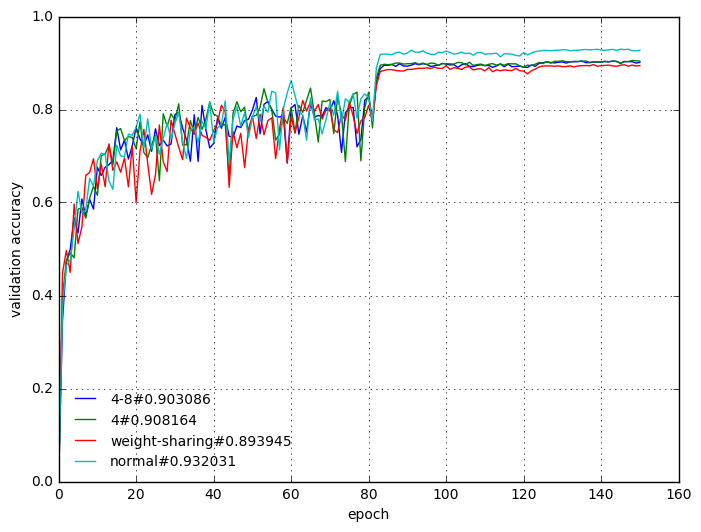

In [10]:
keys = ((4,), (4, 8))
sorted_keys = sorted(keys, key=lambda interval : accuracy_table[interval])
pl.figure(figsize=(8, 6))
for key in sorted_keys:
    value = progress_table[key]
    test_accuracy = accuracy_table[key]
    label = '%s#%f' % (format_interval(key), test_accuracy)
    validation_accuracy = value['validation_accuracy']
    pl.plot(range(len(validation_accuracy)), validation_accuracy, label=label)
plot_baseline()
pl.legend(framealpha=0, loc='best', fontsize='medium')
pl.grid()
pl.xlabel('epoch')
pl.ylabel('validation accuracy')

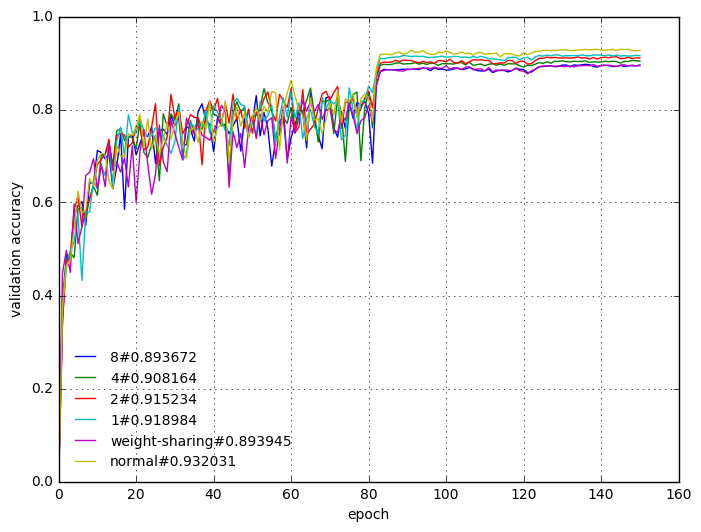

In [11]:
keys = ((1,), (2,), (4,), (8,))
sorted_keys = sorted(keys, key=lambda interval : accuracy_table[interval])
pl.figure(figsize=(8, 6))
for key in sorted_keys:
    value = progress_table[key]
    test_accuracy = accuracy_table[key]
    label = '%s#%f' % (format_interval(key), test_accuracy)
    validation_accuracy = value['validation_accuracy']
    pl.plot(range(len(validation_accuracy)), validation_accuracy, label=label)
plot_baseline()
pl.legend(framealpha=0, loc='best', fontsize='medium')
pl.grid()
pl.xlabel('epoch')
pl.ylabel('validation accuracy')

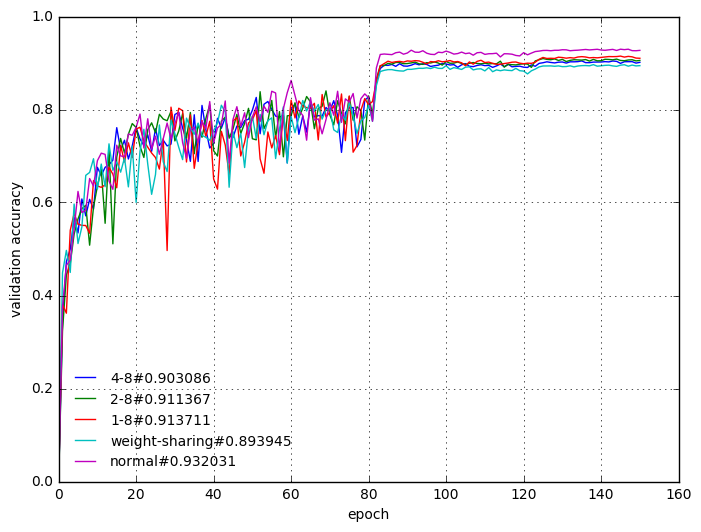

In [12]:
keys = ((1, 8), (2, 8), (4, 8))
sorted_keys = sorted(keys, key=lambda interval : accuracy_table[interval])
pl.figure(figsize=(8, 6))
for key in sorted_keys:
    value = progress_table[key]
    test_accuracy = accuracy_table[key]
    label = '%s#%f' % (format_interval(key), test_accuracy)
    validation_accuracy = value['validation_accuracy']
    pl.plot(range(len(validation_accuracy)), validation_accuracy, label=label)
plot_baseline()
pl.legend(framealpha=0, loc='best', fontsize='medium')
pl.grid()
pl.xlabel('epoch')
pl.ylabel('validation accuracy')